In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
# !pip install kaggle

In [4]:
# from google.colab import files
# iles.upload()

In [5]:
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

In [6]:
# !kaggle datasets download -d mlg-ulb/creditcardfraud

In [7]:
# !mkdir /content/drive/MyDrive/ML_Data/kaggle/creditcard_fraud

In [8]:
# !unzip creditcardfraud.zip -d /content/drive/MyDrive/ML_Data/kaggle/creditcard_fraud

In [9]:
df = pd.read_csv("/content/drive/MyDrive/ML_Data/kaggle/creditcard_fraud/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Class samples
0    284315
1       492
Name: Class, dtype: int64
------------------------------
Class proportions
0    0.998273
1    0.001727
Name: Class, dtype: float64
------------------------------


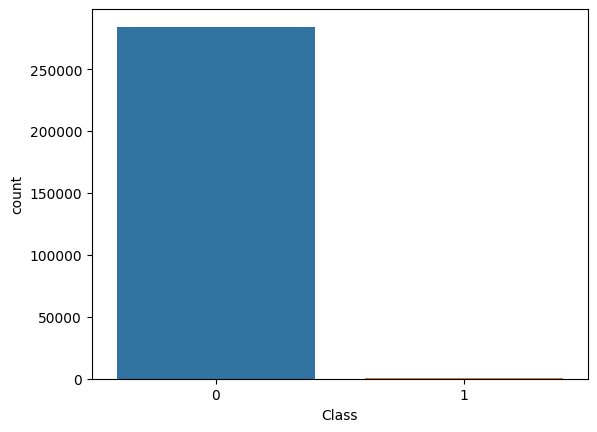

In [10]:
sns.countplot(df, x="Class")
print('Class samples')
print(df["Class"].value_counts())
print('-'*30)
print('Class proportions')
print(df["Class"].value_counts(normalize=True))
print('-'*30)

# Train / Test split

In [11]:
from sklearn.model_selection import train_test_split

X = df.drop(columns="Class")
y = df["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
import xgboost as xgb
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

# Base model

In [13]:
model1 = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
model1.fit(X_train, y_train)

y_pred = model1.predict(X_test)

In [14]:
print(confusion_matrix(y_test, y_pred))

[[56863     1]
 [   21    77]]


In [15]:
print(round(roc_auc_score(y_test, y_pred), 4))

0.8928


# Resampling

## Under-sampling (Random)

In [16]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

In [17]:
model2 = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
model2.fit(X_train_rus, y_train_rus)

y_pred = model2.predict(X_test)

In [18]:
print(confusion_matrix(y_test, y_pred))

[[54724  2140]
 [    6    92]]


In [19]:
print(round(roc_auc_score(y_test, y_pred), 4))

0.9506


## Under-sampling (Cluster Centroids)

In [20]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(random_state=42)
X_train_cc, y_train_cc = cc.fit_resample(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [21]:
model3 = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
model3.fit(X_train_cc, y_train_cc)

y_pred = model3.predict(X_test)

In [22]:
print(confusion_matrix(y_test, y_pred))

[[11591 45273]
 [    1    97]]


In [23]:
print(round(roc_auc_score(y_test, y_pred), 4))

0.5968


## Over-sampling (Random)

In [24]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

In [25]:
model4 = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
model4.fit(X_train_ros, y_train_ros)

y_pred = model4.predict(X_test)

In [26]:
print(confusion_matrix(y_test, y_pred))

[[56860     4]
 [   17    81]]


In [27]:
print(round(roc_auc_score(y_test, y_pred), 4))

0.9132


In [28]:
print(f"Under: {len(y_train_rus)}")
print(f"Over: {len(y_train_ros)}")

Under: 788
Over: 454902


## Over-sampling (SMOTE)

In [29]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [30]:
model5 = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
model5.fit(X_train_sm, y_train_sm)

y_pred = model5.predict(X_test)

In [31]:
print(confusion_matrix(y_test, y_pred))

[[56846    18]
 [   15    83]]


In [32]:
print(round(roc_auc_score(y_test, y_pred), 4))

0.9233


# Configure class weight

In [33]:
print(y_train.value_counts())
print(len(y_train))

0    227451
1       394
Name: Class, dtype: int64
227845


In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
model6 = xgb.XGBClassifier(objective="binary:logistic", random_state=42)

In [33]:
param_grid = {"scale_pos_weight": [10, 100, 577.28]}

grid = GridSearchCV(estimator=model6, param_grid=param_grid, n_jobs=-1, cv=5, scoring='roc_auc')
grid_result = grid.fit(X_train, y_train)

In [34]:
params = grid_result.cv_results_["params"]
mean = grid_result.cv_results_["mean_test_score"]

In [36]:
grid_result.cv_results_

{'mean_fit_time': array([239.52128816, 237.39635749, 231.53886747]),
 'std_fit_time': array([19.12971759,  4.20988385, 33.63681077]),
 'mean_score_time': array([0.25377269, 0.25740023, 0.21879778]),
 'std_score_time': array([0.04180166, 0.06037325, 0.03509338]),
 'param_scale_pos_weight': masked_array(data=[10, 100, 577.28],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'scale_pos_weight': 10},
  {'scale_pos_weight': 100},
  {'scale_pos_weight': 577.28}],
 'split0_test_score': array([0.98346531, 0.98224501, 0.97758813]),
 'split1_test_score': array([0.97506671, 0.96913357, 0.97174257]),
 'split2_test_score': array([0.96692777, 0.96348175, 0.97270314]),
 'split3_test_score': array([0.99094334, 0.99103433, 0.99395082]),
 'split4_test_score': array([0.98166324, 0.9763701 , 0.97792337]),
 'mean_test_score': array([0.97961328, 0.97645295, 0.97878161]),
 'std_test_score': array([0.00811177, 0.00967468, 0.00798451]),
 'rank_test_sco

In [34]:
model7 = xgb.XGBClassifier(objective="binary:logistic",
                           scale_pos_weight=577.28, random_state=42)
model7.fit(X_train, y_train)

y_pred = model7.predict(X_test)

In [35]:
print(confusion_matrix(y_test, y_pred))

[[56861     3]
 [   16    82]]


In [36]:
print(round(roc_auc_score(y_test, y_pred), 4))

0.9183
